# Autograd

In Artificial Neural Networks, **back-propagation** is the process of computing the gradients of a loss function. It is common to use the *gradient descent* algorithm to find the minimum of the loss function.

Finding these gradients means differentiating the loss function with respect to (*wrt*) each of the parameters. 

**Automatic differentiation** is a way of automating the acquisition of these derivatives.

In [1]:
!python --version

Python 3.9.13


## Derivatives understanding

### Function definition

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return x**2 + 3 * x - 2

In [4]:
X = np.linspace(-5, 5, 100)
y = f(X)

### Visualization

In [5]:
import random

def random_index(X) -> int:
    random.seed(42)
    return random.randint(0, X.shape[0] - 1)

In [6]:
def plot_function(X, y, nb):
    
    plt.figure(figsize=(8,5))

    plt.plot(X, y)
    plt.scatter(X[nb], y[nb], c='green')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.title(f'f({nb}) : ({X[nb]:.2f}, {y[nb]:.2f})')

Quadratic function


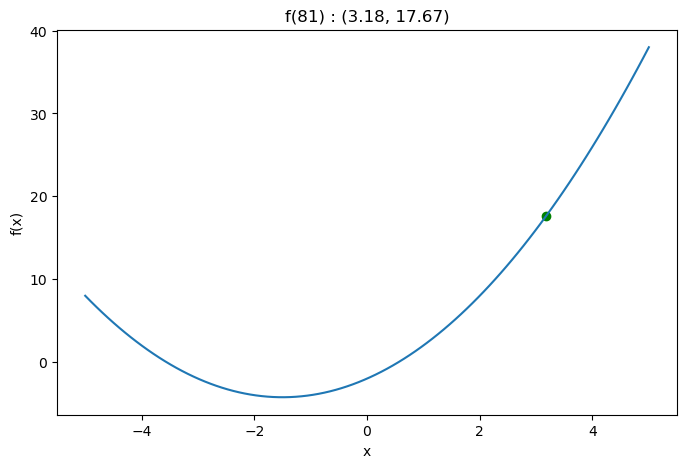

In [7]:
nb = random_index(X)
print("Quadratic function")
plot_function(X, y, nb)

### Derivative definition

In [8]:
def differentiate(x):
    return 2 * x + 3

In [9]:
dfx = differentiate(X)

Derivative of quadratic function


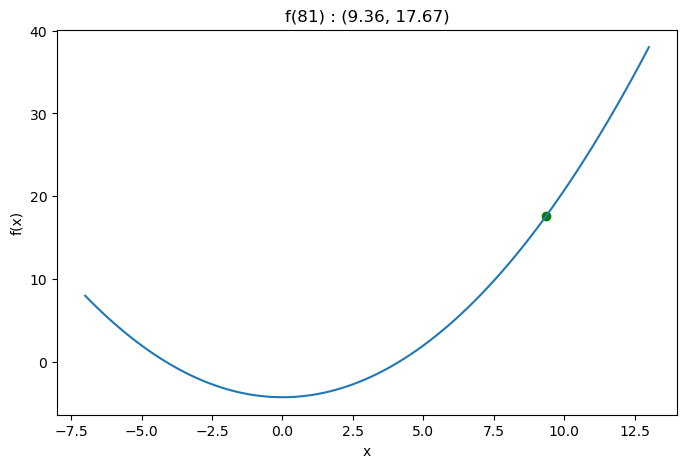

In [10]:
print("Derivative of quadratic function")
plot_function(dfx, y, nb)

### Slope visualization

Reminder : the slope equation is defined as $y = mx + b$. To find the equation of the tangent line, we use $y - y_{1} = m(x - x_{1})$

In [11]:
def tangent_line(X, y, nb):
    x1, y1 = X[nb], y[nb]
    m = dfx[nb]
    return m * (X - x1) + y1

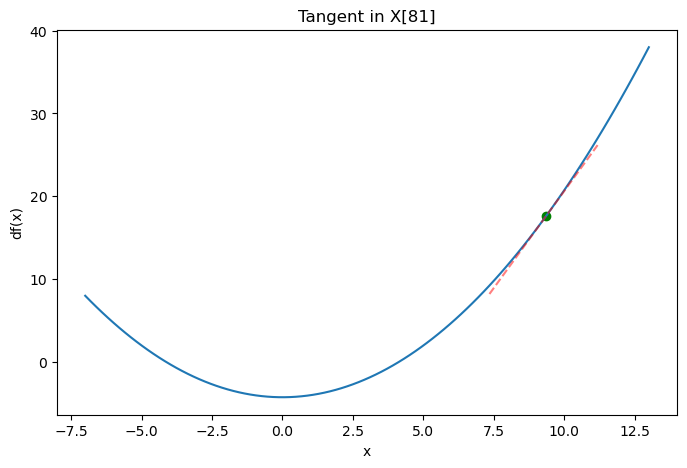

In [12]:
tangent = tangent_line(X, y, nb)

plt.figure(figsize=(8, 5))

plt.plot(dfx, y)
plt.scatter(dfx[nb], y[nb], c='green')
plt.plot(dfx[nb - 10:nb + 10], tangent[nb - 10:nb + 10], 'r--', alpha=0.5)

plt.title(f'Tangent in X[{nb}]')
plt.xlabel('x')
plt.ylabel('df(x)')
plt.show()

### Visualize the local minimum (gradient descent in one dimension)

In [13]:
import math

def plot_descent(dfx, y, nb):
    # Hyper-parameters
    alpha = 1
    epochs = 0
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(dfx, y)
    plt.scatter(dfx[nb], y[nb], c='green', alpha=0.5)

    
    while epochs < 15:
        
        nb = nb - (alpha * round(dfx[nb]))
        plt.scatter(dfx[nb], y[nb], c='red', alpha=0.5)
        epochs += 1
    
    return epochs, dfx[nb]

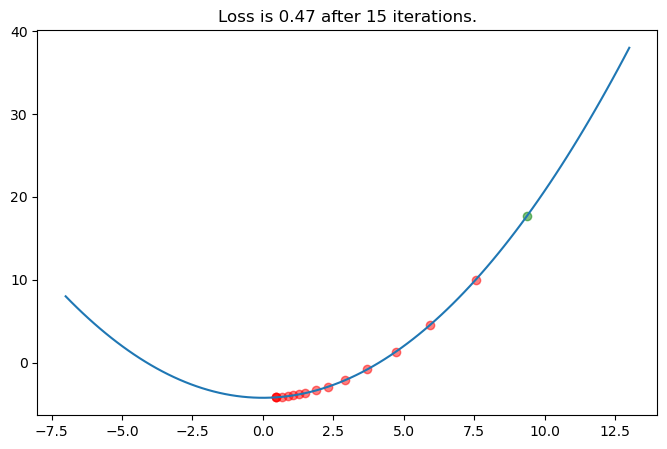

In [14]:
epochs, last_loss = plot_descent(dfx, y, nb)

plt.title(f'Loss is {last_loss:.2f} after {epochs} iterations.')
plt.show()